In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import locale
from locale import atof

In [ ]:
data_path = "/content/drive/MyDrive/wine.csv"
ds = pd.read_csv(data_path)

# Filling null with mean method

In [ ]:
ds=ds.fillna(ds.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


### Checking for null values

In [ ]:
ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


Selecting density pH sulphates alcohol

In [ ]:
ds.iloc[:, [7,8,9,10]]

,density,pH,sulphates,alcohol
0,0.99780,3.51,0.56,9.4
1,0.99680,3.20,0.68,9.8
2,0.99700,3.26,0.65,9.8
3,0.99800,3.16,0.58,9.8
4,0.99780,3.51,0.56,9.4
...,...,...,...,...
1594,0.99490,3.45,0.58,10.5
1595,0.99512,3.52,0.76,11.2
1596,0.99574,3.42,0.75,11.0
1597,0.99547,3.57,0.71,10.2


Performing KNN

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
cols = ['fixed acidity','volatile acidity','density','pH','sulphates','alcohol'] 
ds[cols] = sc.fit_transform(ds[cols]) 
X = ds.iloc[:, [7,8,9,10]].values
y = ds.iloc[:, -1].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean', p = 1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
cm

array([[118,  30],
       [ 63, 109]])

In [ ]:
ac

0.709375

plotting confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


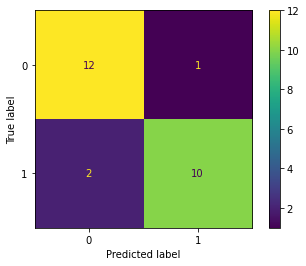

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

Setting bayes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
features = ["density", "pH", "sulphates", "alcohol"]
target = "quality"

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(ds[features],
ds[target],
test_size = 0.33,
random_state = 54)

In [ ]:
model = GaussianNB()
model.fit(features_train, target_train)

GaussianNB()

In [ ]:
pred = model.predict(features_test)
accuracy = accuracy_score(target_test, pred)

In [ ]:
pred

array(['bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good',
       'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad',

In [ ]:
accuracy

0.6875

Inference

KNN achieved an accuracy score of: 0.709375

and Bayes achived an accuarcy score of: 0.6875